# Who survived the Titanic Disaster?

This project will be using the famous Titanic dataset which includes information on the passengers.  To start with, I will follow along the lines of the Udemy course (data visualization with Python) which gives a basic introduction to the data and some of the seaborn plotting techniques.  In my analysis of the data, I go beyond what is shown in this course to look for other correlations which may exist in the data and I also apply my machine learning skills with Scikit-Learn at the end.  This is beyond what is in the Udemy course.

In turn, the data comes from the Kaggle Titanic Challenge at the following link:

https://www.kaggle.com/c/titanic-gettingStarted

From here, I've downloaded the train.csv file into the same directory as this notebook

This first things I have to do, as with any python program, is to import my modules.  In this notebook, I will be extensively using the numpy and pandas modules.  I will also be using matplotlib and seaborn for visualization.

In [55]:
# First of all, import files into python
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# The following is required to visualise plots within the iPython notebook
%matplotlib inline


Now I want to read the data into a pandas dataframe and actually visualise it.  This is very straightforward in python/pandas.  I don't want to look at the whole DataFrame for now, I just want to look at the first few entries.

In [56]:
titanic_df = pd.read_csv("./train.csv")

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In the "Survived" column, 0 means that they died and a 1 means that they survived

The "SibSp" column represents the number of siblings they had on board

The Parch column refers to the number of parents or children they have on board.

e.g. Miss Laina Heikkinen (PassengerId = 3) was alone on the ship

Now I want to know information about each of the columns, such as the number of entries in each column.  That is important as not every column could have an entry.  In fact, that is something we observe with this dataset.

In [57]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


The following text comes form the Udemy course and is something which I will follow along with.  I will also explore more deeply into the dataset than the Udemy course did.

All good data analysis projects begin with trying to answer questions. Now that we know what column category data we have let's think of some questions or insights we would like to obtain from the data. So here's a list of questions we'll try to answer using our new data analysis skills!

First some basic questions:

    1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
    2.) What deck were the passengers on and how does that relate to their class?
    3.) Where did the passengers come from?
    4.) Who was alone and who was with family?
    
Then we'll dig deeper, with a broader question:

    5.) What factors helped someone survive the sinking?
    
First of all, I just want to get my head around some of the data.  How old were people, how many people had siblings/spouses on board.  How many people had parents/children on board (these should double counted of course, because both the parent/child will and sibling/spouse will both be recorded).

## Passenger Age

The first column that I will explore is the "Age" column and the first plot I have is just a histogram of the age distribution.  With a histogram, the column height represents the number of people in that age "bin".  The default binning is 10 bins.  Below I make this "default" size plot and then also increase the binning on a different panel to zoom in.  As we can see, the majority of people are between 20 and 30 years old. We can also see that the majority of childre are less than 4 years old.

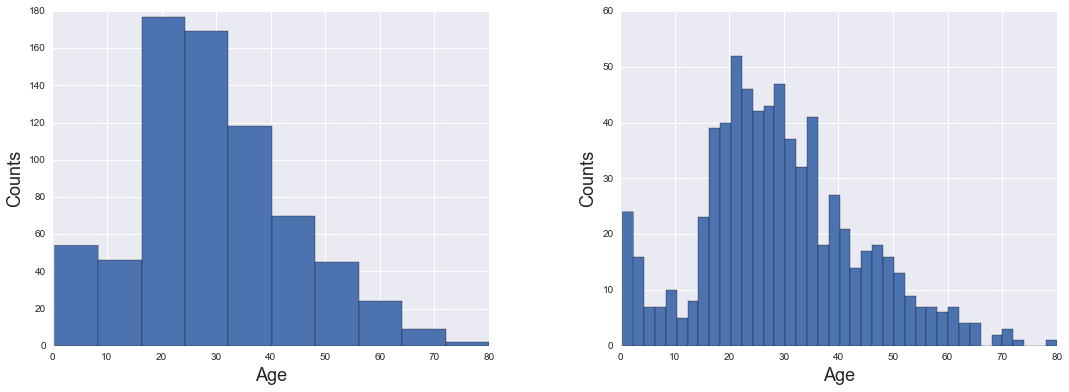

In [58]:
fig = plt.figure(figsize=(18,6))

ax1 = plt.subplot(121)
titanic_df.hist('Age',ax=ax1)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Counts', fontsize=18)
plt.title("")

ax2 = plt.subplot(122)
titanic_df.hist('Age',bins=40,ax=ax2)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Counts', fontsize=18)
plt.title("")

From this, we can easily calculate what the mean age of the passengers was.

In [59]:
titanic_df['Age'].mean()

29.69911764705882

While we are looking at the ages of passengers, it would be nice to know if there was a difference in the ages of the passengers who survived and those who perished.  We can look at this plot below.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x111159490>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1111ae8d0>], dtype=object)

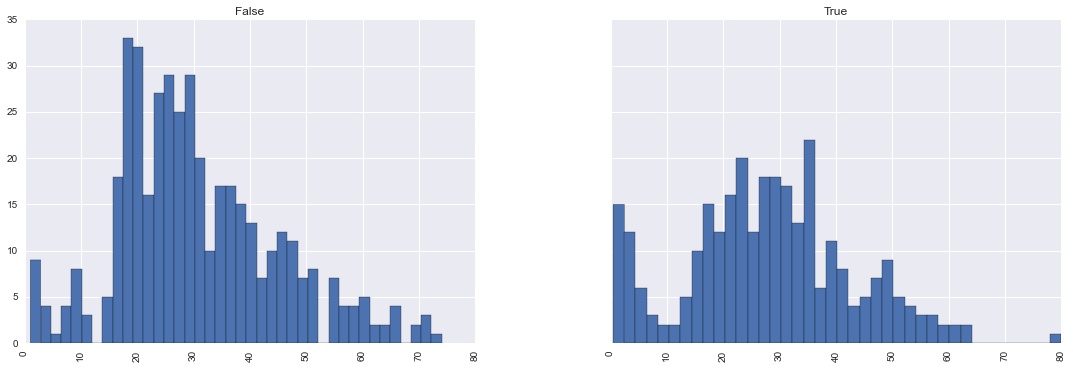

In [60]:
titanic_df.hist('Age', titanic_df["Survived"]>0,bins=40,figsize=(18,6),sharey=True)

So, in these two plots, the one labelled "False" are those who didn't sirvive and the one labelled "True" are the ones who did survive.  The ones who did survive appears to be slightly flatter above 20 than the distirbution for those who didn't survive whereas the number of children under 10 who survived is greater than the number who perished.  While we are looking at these distributions, it would be nice to know if there was a difference in the mean of the ages of the passengers who survived and those who perished.  We cam also examine the means of the distributions by calling the groupby() function.  This actually shows that there was little difference in the mean of the ages of those who survived and those who perished.  This could just be though that the 20-40 age group is dominating.

In [61]:
titanic_df.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


To actually see this, we can look at the standard deviation and we see that this is quite high for both classes of passengers, so this small difference in age is not statistically significant.

In [62]:
titanic_df.groupby('Survived').std()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,260.640469,0.735805,14.172110,1.288399,0.823166,31.388207
1,252.358840,0.863321,14.950952,0.708688,0.771712,66.596998


# Siblings/Spouses and Parents/Children

Now that I have explored the Age column, it is worth exploring other columns.  Two columns which are similar are the "SibSp" and "Parch" column.  The former represents the number of siblings/spouses travelling with each passenger and the "Parch" column represents the number of parents/children travelling with each passenger.  Let's have a look at these distributions.


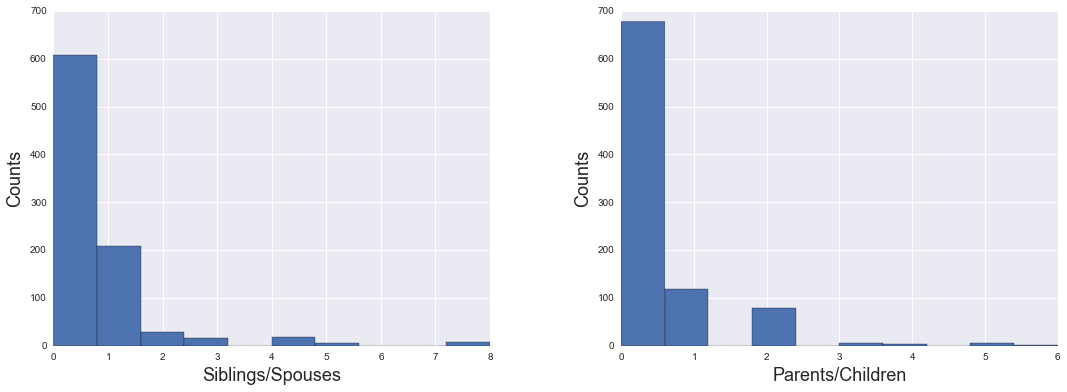

In [63]:
fig2 = plt.figure(figsize=(18,6))

ax1 = plt.subplot(121)
titanic_df.hist('SibSp',ax=ax1)
plt.xlabel('Siblings/Spouses', fontsize=18)
plt.ylabel('Counts', fontsize=18)
plt.title("")

ax2 = plt.subplot(122)
titanic_df.hist('Parch',ax=ax2)
plt.xlabel('Parents/Children', fontsize=18)
plt.ylabel('Counts', fontsize=18)
plt.title("")

We can also look the distribution of people who survived or perished depending on whether they had and sibling/spouses or parents/children on board.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1114f8050>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1125aa190>], dtype=object)

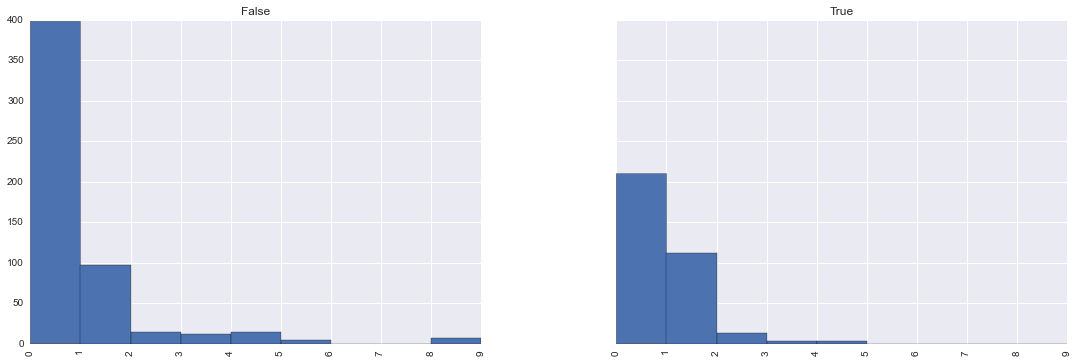

In [64]:
titanic_df.hist('SibSp', titanic_df["Survived"]>0,figsize=(18,6),sharey=True,bins=9,range=[0,9])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10da144d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x112acc890>], dtype=object)

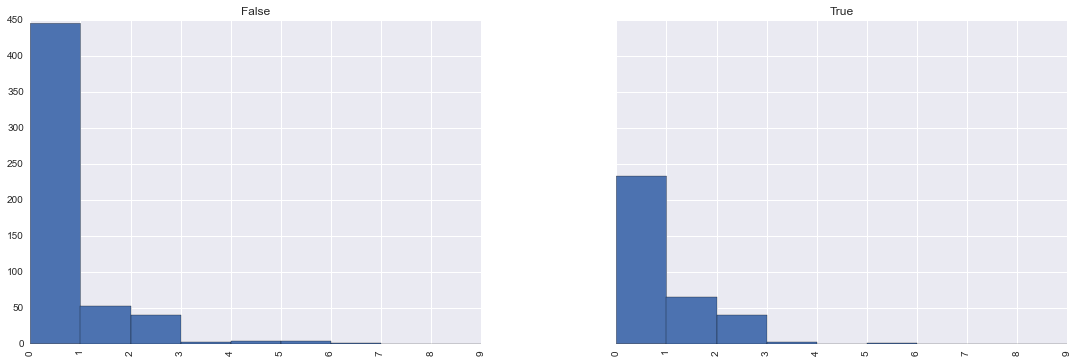

In [65]:
titanic_df.hist('Parch', titanic_df["Survived"]>0,figsize=(18,6),sharey=True,bins=9,range=[0,9])

So, it appears that the vast majority of people were travelling alone.  However, maybe the ones who had no siblings or spouses where there as parents/children.  We can plot a scattergraph to look into this.

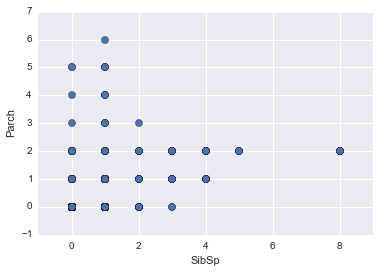

In [66]:
titanic_df.plot(kind='scatter', x='SibSp', y='Parch',s=50)

So this shows is that there are cases where people are on their own and ones where they are not on their own.  Maybe the best was of looking at this is to count people who either had siblings/spouses or parents/children with them as having family members.  To do this, I can create an additional column for my DataFrame and parse the "SibSp" and "Parch" columns.

In [67]:
def male_female_child(passenger):
    age, sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex
    
# axis=1 is used as it is a column and not an index

titanic_df['Person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

At this moment in time, I don't really care about the PassengerId column.  Nor do I care about the Name nor the Ticket columns so I will drop them and then take a look at what the DataFrame looks like.

In [68]:
titanic_df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Person
0,0,3,male,22,1,0,7.2500,NaN,S,male
1,1,1,female,38,1,0,71.2833,C85,C,female
2,1,3,female,26,0,0,7.9250,NaN,S,female
3,1,1,female,35,1,0,53.1000,C123,S,female
4,0,3,male,35,0,0,8.0500,NaN,S,male


## Port of Embarkation

I also know that the Embarked column contains codes.  "S" represents Southampton (England), "C" represents "Cherbourg" (in Normandy, France) and "Q" represents "Queenstown" (Ireland - now known as Cobh).  "Queenstown" is on the South Coast of Ireland near Cork.

Let's look at the timeline of the journey.

- April 10th: 12:00 - Leave Southampton, England
- April 10th: 18:30 - Arrive Cherbourg, France (Normandy)
- April 11th: 13:30 - Leaves Queenstown, Ireland (now known as Cobh).
- April 14th: 23:40 - Titanic hits an iceberg
- April 15th: 02:20 - Titanic sinks
- April 15th: 04:10 - Carpathia picks up the first of the survivors
- April 18th:       - Carpathia arrives in New York with 705 survivors on board

In [69]:
def embark(passenger):
    port = passenger
    
    if port == "S":
        port = 'Southampton'
    elif port == "C":
        port = 'Cherbourg'
    elif port == "Q":
        port = "Queenstown"
    
    return port

titanic_df['Embarked'] = titanic_df['Embarked'].apply(embark)

So, let's take a look at the distribution of where the passengers boarded.  I doubt that this will have an effect on whether someone survived or not, but it is still interesting.

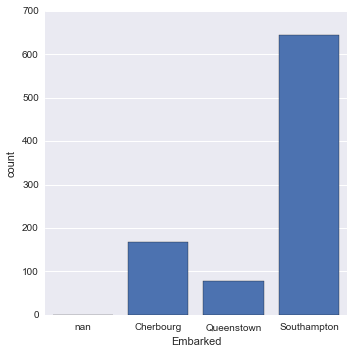

In [70]:
sns.factorplot('Embarked',data=titanic_df)

So, as can be seen, there are a number of "NaN" entries.  If I choose an order of the x bins to only include "Cherbourg", "Queenstown" and "Southampton", then I can get rid of this, as shown below.

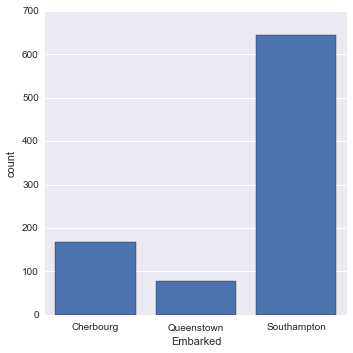

In [71]:
sns.factorplot('Embarked',data=titanic_df,x_order=['Cherbourg','Queenstown','Southampton'])

## Passenger Fare

For now, I will ignore the port of embarkation and look at other columns. One possible factor in whether someone survived or perished is the fare that they paid.  I can plot that now.

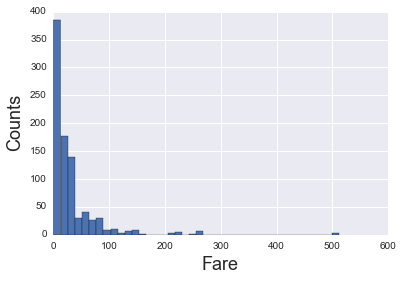

In [72]:
titanic_df.hist('Fare',bins=40)
plt.xlabel("Fare", fontsize=18)
plt.ylabel("Counts", fontsize=18)
plt.title("")

This shows that the majority of people paid little although there were a number of passengers who paid well over £100 for their ticket.  According to the website: http://safalra.com/other/historical-uk-inflation-price-conversion/ then £100 in 1912 is approximately £10,000 now.  That means that a number of people paid more than US$15,000 for their tickets.  That is a significant sum in today's currency!

In fact, according to British Airway's website, a one-way 1st class ticket to fly from London to New York on April 12th 2016 will cost just less than £8000.  That's cheaper than a number of passengers paid for their trip on the Titanic!

One thing that would be interesting would be to see what the distribution of fares was in the different classes of travel (1st, 2nd or 3rd and indicated by the "Pclass" column).

To do this, I use the following syntax to parse my dataframe so that I am only choosing Pclasses of the correct value

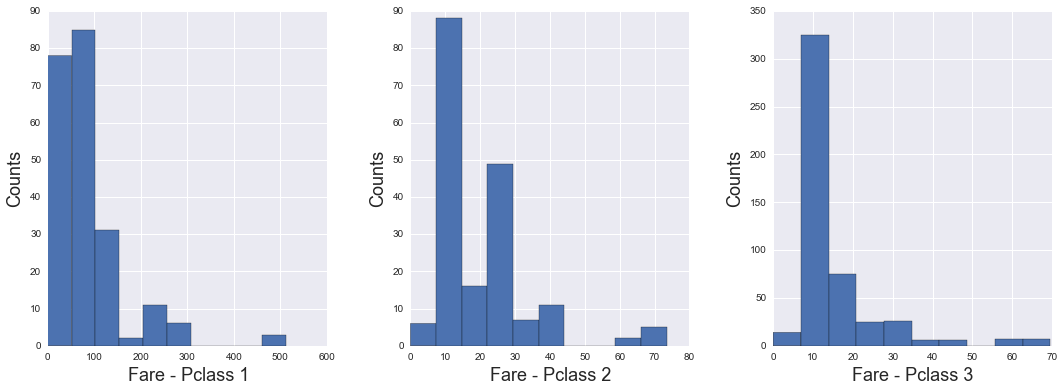

In [73]:
fig2 = plt.figure(figsize=(18,6))

ax1 = plt.subplot(131)
titanic_df[titanic_df['Pclass'] == 1].hist('Fare',ax=ax1)
plt.xlabel('Fare - Pclass 1', fontsize=18)
plt.ylabel('Counts', fontsize=18)
plt.title("")

ax2 = plt.subplot(132)
titanic_df[titanic_df['Pclass'] == 2].hist('Fare',ax=ax2)
plt.xlabel('Fare - Pclass 2', fontsize=18)
plt.ylabel('Counts', fontsize=18)
plt.title("")

ax3 = plt.subplot(133)
titanic_df[titanic_df['Pclass'] == 3].hist('Fare',ax=ax3)
plt.xlabel('Fare - Pclass 3', fontsize=18)
plt.ylabel('Counts', fontsize=18)
plt.title("")

Interestingly, some people in 3rd class paid more than some people in 1st class!  Now, how likely is it that you survived if you spent more on your ticket?  The next 4 plots show that the more you paid for your ticket, the more likely you were to have survived.  You didn't have to buy the most expensive ticket, in fact, even if you paid over £25, you were more likely to survive than perish.  If you paid more than £50, you were twice as likely to survive as perish.  However, if you paid under £25 for your ticket (US$400 in today's money), you were twice as likely to perish as you were to survive.

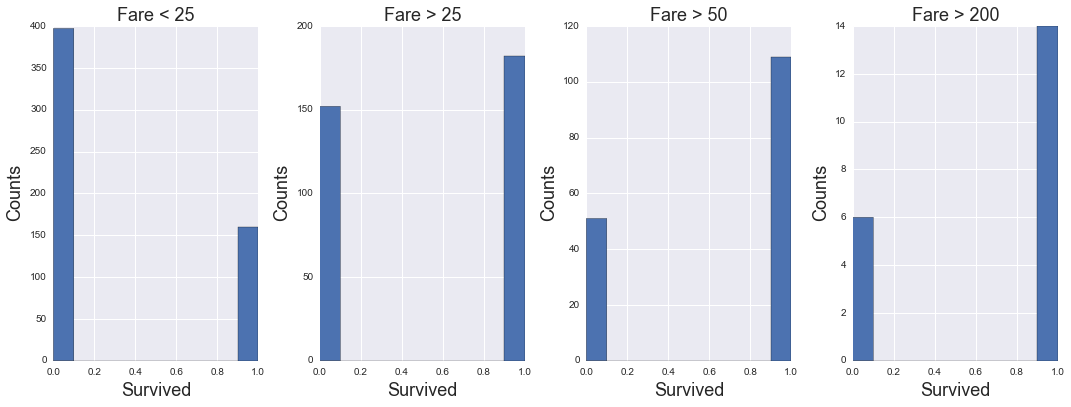

In [74]:
fig3 = plt.figure(figsize=(18,6))

ax1 = plt.subplot(141)
titanic_df[titanic_df['Fare'] < 25].hist('Survived',ax=ax1)
plt.xlabel('Survived', fontsize=18)
plt.ylabel('Counts', fontsize=18)
plt.title("Fare < 25", fontsize=18)

ax2 = plt.subplot(142)
titanic_df[titanic_df['Fare'] > 25].hist('Survived',ax=ax2)
plt.xlabel('Survived', fontsize=18)
plt.ylabel('Counts', fontsize=18)
plt.title("Fare > 25", fontsize=18)

ax3 = plt.subplot(143)
titanic_df[titanic_df['Fare'] > 50].hist('Survived',ax=ax3)
plt.xlabel('Survived', fontsize=18)
plt.ylabel('Counts', fontsize=18)
plt.title("Fare > 50", fontsize=18)

ax4 = plt.subplot(144)
titanic_df[titanic_df['Fare'] > 200].hist('Survived',ax=ax4)
plt.xlabel('Survived', fontsize=18)
plt.ylabel('Counts', fontsize=18)
plt.title("Fare > 200", fontsize=18)

In fact, I can actually do a linear regression to the survival data as a function of passenger fare.  This is shown in the plot below which illustrates the trend we see in the above histograms.  Although fitting the data shows this quite nicely, I actually think that the fit might be a little misleading due to the point around £500 (maybe this is an input error and needs removing from the dataset?).  Anyway, the histograms above make this point very nicely.

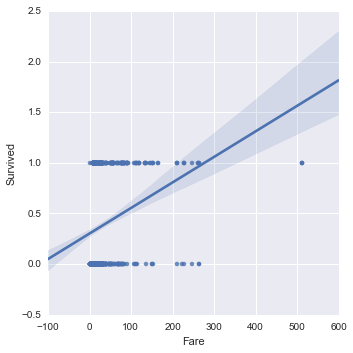

In [75]:
sns.lmplot('Fare','Survived',data=titanic_df)

## Passenger Class

Although passenger class is correlated to fare, as we saw above, there isn't a 1-1 correlation so it is also worth exploring this column.  First up, let's have a look at how likely you are to have survived if you were in 1st, 2nd or 3rd class. 

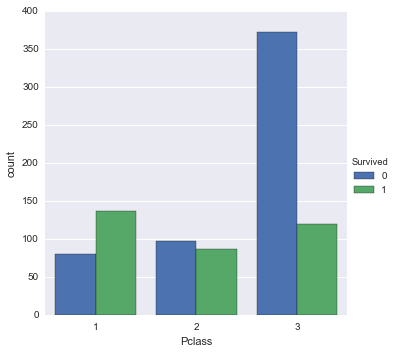

In [76]:
sns.factorplot('Pclass',data=titanic_df,hue='Survived')

As you might expect, if you were in 1st class, you were more likely to have survived than to have perished.  In 2nd class, you had a roughly 50-50 chance of surviving.   However, if you were in 3rd class, you most likely perished.  This is quite correlated to the "Fare" analysis we did above.  Although the classes don't divide equally into ranges of fares, there is a large degree of overlap.

We see this in the plot below.  I artificially cut off the 1st class datapoints at £100 just so that the plot looks good but you can easily see that the majority of the 3rd class tickets were cheaper than the 2nd class tickets which were cheaper than the 1st class tickets.  When I do the machine learning part of this notebook later, I will not be able to fit both the "Fare" and "Pclass" columns because of the high degree of correlation.

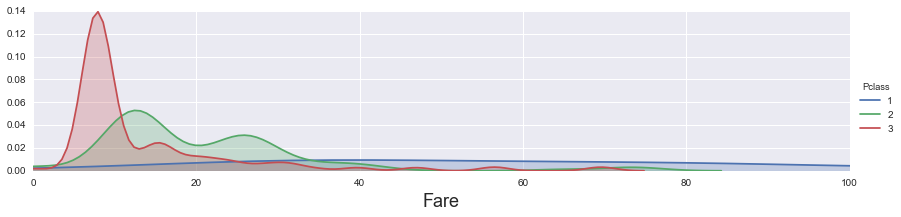

In [77]:
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Fare',shade=True).add_legend()
fig.set(xlim=(0,100))
plt.xlabel("Fare",fontsize=18)


One other thing we can also look at is the distribution of ages as a function of passenger class.  This shows a trend that the older person was in the higher class.

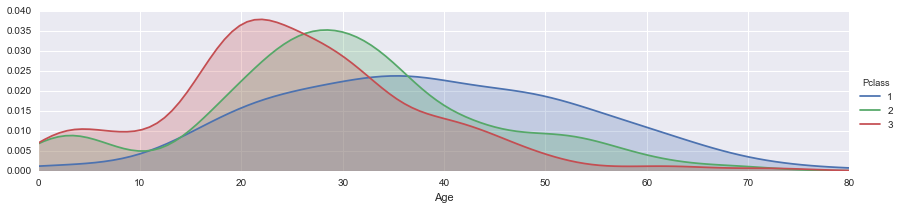

In [78]:
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

# Set xmax by the age of the oldest passenger
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest)).add_legend()

In fact, by manipulating the DataFrame, I can calculate the mean of the age distribution for different classes of passenger.  These are given below and show quite large differences.  I have calculated the error on the mean as the standard deviation divided by the square root of the sample size.

As you can see below, the difference in mean ages is not statistically significant between each successive passenger class. 

In [79]:
print "Mean age in 1st class =", round(titanic_df[titanic_df['Pclass'] == 1]['Age'].mean(),2), "+/-", round(titanic_df[titanic_df['Pclass'] == 1]['Age'].std(),2)
print "Mean age in 2nd class =", round(titanic_df[titanic_df['Pclass'] == 2]['Age'].mean(),2), "+/-", round(titanic_df[titanic_df['Pclass'] == 2]['Age'].std(),2)
print "Mean age in 3rd class =", round(titanic_df[titanic_df['Pclass'] == 3]['Age'].mean(),2), "+/-", round(titanic_df[titanic_df['Pclass'] == 3]['Age'].std(),2)

Mean age in 1st class = 38.23 +/- 14.8
Mean age in 2nd class = 29.88 +/- 14.0
Mean age in 3rd class = 25.14 +/- 12.5


## Passenger Sex

It is worth exploring the sex of the passenger to see if there was a difference between male and female to see who survived or not.  One of the unspoken maritime laws is "women and children" first into the lifeboats.  The question is whether that unspoken tradition was true in the case of the Titanic.

The first thing to look at is simply, how many passengers were male and how many were female.

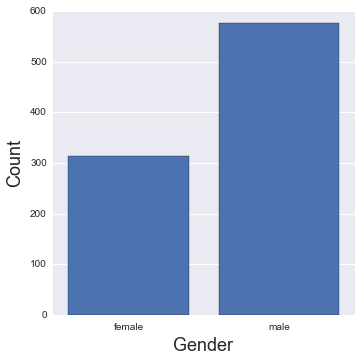

In [80]:
sns.factorplot('Sex',data=titanic_df)
plt.xlabel("Gender",fontsize=18)
plt.ylabel("Count",fontsize=18)

So, the vast majority of the passengers were male.  Now, the question is of these male and female passengers, who was more likely to have survived.

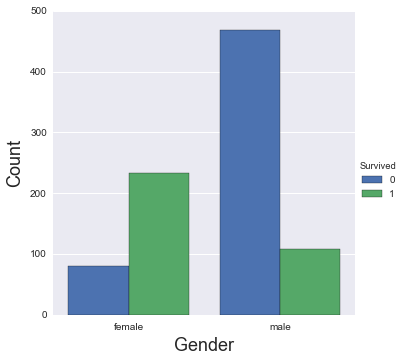

In [81]:
sns.factorplot('Sex',data=titanic_df,hue='Survived')
plt.xlabel("Gender",fontsize=18)
plt.ylabel("Count",fontsize=18)

So, that is interesting.  The vast majority of females actually survived whereas the vast majority of males perished.  Now, I think that it is unfair to class small children into the male/female class as their treatment was probably independent of their gender.  So, I can create a new plot using the "Person" column I created earlier to look at this.

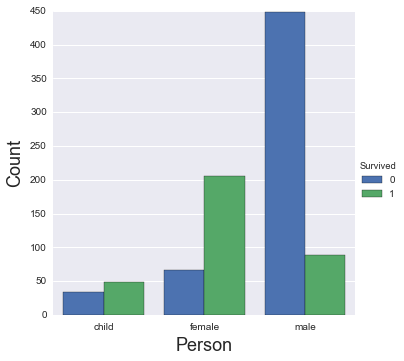

In [82]:
sns.factorplot('Person',data=titanic_df,hue='Survived')
plt.xlabel("Person",fontsize=18)
plt.ylabel("Count",fontsize=18)

This shows a roughly even split for the children if they survived, although they were more likely to survive than perish.  The difference between adult females and adult males and whether or not they perished though is incredibly striking.  One question could be why this occurs.  Is this just a symptom of "women and children first" or is there something into it.  Let's have a look at the distribution of people as a function of class.

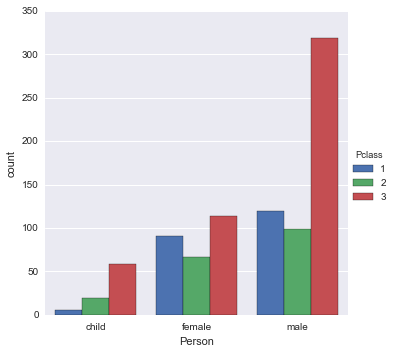

In [83]:
sns.factorplot('Person',data=titanic_df,hue='Pclass')

So, this shows that the vast majority of men (and children) were travelling in 3rd class whereas the the females were more evenly split between class.  Let's have a look at how this affected their survival rate.  

The plot below shows that independent of class, men were more likely to perish than survive whereas if you were a child or a female in the top two classes, you were more likely to survive!

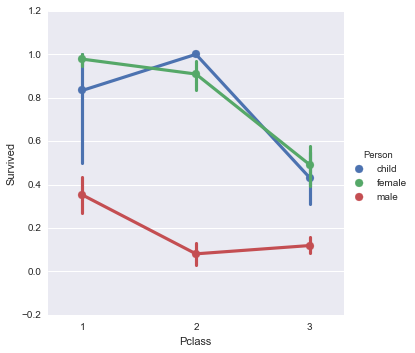

In [84]:
# Another way of looking at this is:
sns.factorplot('Pclass','Survived',hue='Person',data=titanic_df)

Another question is whether or not people travelling with family were more likely to survive or not.  My earlier investigations were inconclusive as it wasn't clear whether or not the siblings/spouses and parents/children columns were correlated.  In order to address this, I will create a new column in my DataFrame which will address whether a passenger was accompanied or not.

The first thing to do is to remind myself of what the DataFrame looks like:

In [85]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Person
0,0,3,male,22,1,0,7.2500,NaN,Southampton,male
1,1,1,female,38,1,0,71.2833,C85,Cherbourg,female
2,1,3,female,26,0,0,7.9250,NaN,Southampton,female
3,1,1,female,35,1,0,53.1000,C123,Southampton,female
4,0,3,male,35,0,0,8.0500,NaN,Southampton,male


In [86]:
titanic_df["Alone"] = titanic_df.SibSp + titanic_df.Parch
titanic_df["Alone"].loc[titanic_df['Alone'] >0] = 'With Family'
titanic_df["Alone"].loc[titanic_df['Alone'] ==0] = 'Alone'

So, that should create the extra column, let's have a look at the DataFrame to check that has worked as expected

In [87]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Person,Alone
0,0,3,male,22,1,0,7.2500,NaN,Southampton,male,With Family
1,1,1,female,38,1,0,71.2833,C85,Cherbourg,female,With Family
2,1,3,female,26,0,0,7.9250,NaN,Southampton,female,Alone
3,1,1,female,35,1,0,53.1000,C123,Southampton,female,With Family
4,0,3,male,35,0,0,8.0500,NaN,Southampton,male,Alone


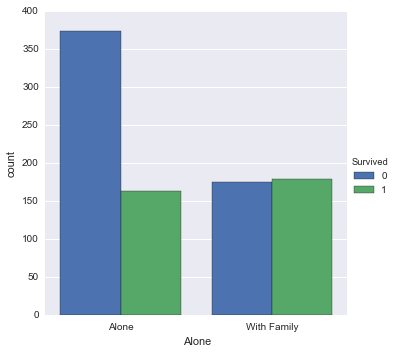

In [88]:
sns.factorplot('Alone',data=titanic_df,hue='Survived')

So, the first plot shows that if you were travelling with family, you had a roughly 50/50 chance of surviving.  However, if you were alone, this was around 30%.  Now let's have a look at the gender distrbution.  We can probably guess from the analysis so far however what the result is likely to be!

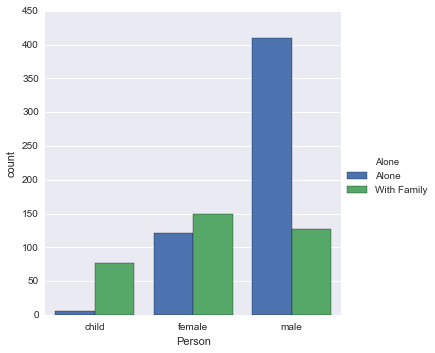

In [89]:
sns.factorplot('Person',data=titanic_df,hue='Alone')

As we can see, and as expected, almost all the children were travelling with family whereas the majority of men were travelling on their own.  Women were more likely than not to be travelling with family although that distribution, somewhat surprisingly to me at least, is close to even.  Maybe some people were joining family that were already in the USA, it is not possible to ascertain that from this dataset although that would be a natural explanation.

I'm interested to know the age distribtion of the children who were travelling alone, let's see if we can plot this.

The first thing I have to do is to create a separate DataFrame with just children in it.  The I can cut on whether or not they were alone and plot the age distribution

In [90]:
child_df = titanic_df[titanic_df["Person"] == "child"]
child_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Person,Alone
7,0,3,male,2,3,1,21.0750,NaN,Southampton,child,With Family
9,1,2,female,14,1,0,30.0708,NaN,Cherbourg,child,With Family
10,1,3,female,4,1,1,16.7000,G6,Southampton,child,With Family
14,0,3,female,14,0,0,7.8542,NaN,Southampton,child,Alone
16,0,3,male,2,4,1,29.1250,NaN,Queenstown,child,With Family


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117a7ead0>]], dtype=object)

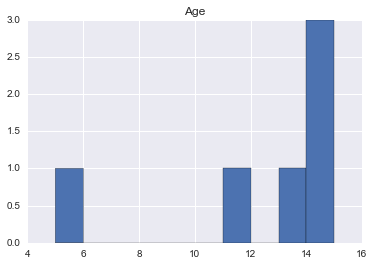

In [91]:
child_df[child_df['Alone'] == 'Alone'].hist('Age')

So, remarkably, there was a child aged 5 travelling alone and they survived, as shown in the plot below!

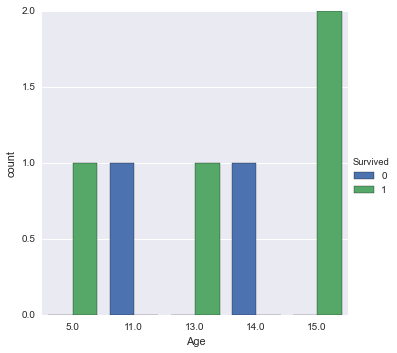

In [92]:
child_alone_df = child_df[child_df["Alone"] == "Alone"]
sns.factorplot('Age',data=child_alone_df,hue='Survived')

One final thing to look at in the age and gender study is a fit to the data.  The plot below shows a linear regression fit to the data.  This shows that if you were female, the older you were, the more likely you were to survive whereas if you were male, the older you were the more likely you were to perish!

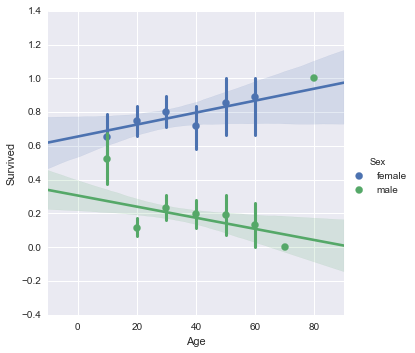

In [93]:
generations = [10,20,30,40,50,60,70,80]
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,x_bins=generations)

So, I think I have fully explored the gender and class columns, now it is time to move onto the cabin column and see if we can learn anything here.

## Passenger Cabin and Deck

In the DataFrame, the cabin string is prefixed with a letter and then a number.  This letter refers to what deck the cabin was on.  Unfortunately, this information is sparse but there is enough information that we can work with it.

The first thing that I therefore want to do is to create a new column in my DataFrame and find out what deck passengers were on and how does that relate to their class.

In [94]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Person,Alone
0,0,3,male,22,1,0,7.2500,NaN,Southampton,male,With Family
1,1,1,female,38,1,0,71.2833,C85,Cherbourg,female,With Family
2,1,3,female,26,0,0,7.9250,NaN,Southampton,female,Alone
3,1,1,female,35,1,0,53.1000,C123,Southampton,female,With Family
4,0,3,male,35,0,0,8.0500,NaN,Southampton,male,Alone


The problem with the cabin info is that there are lots of null values.  I can use the dropna() function to get rid of the NaN values, but I don't want to lose the information in the titanic_df DataFrame, so I will not do it "inplace" but rather create a new DataFrame.

The first thing to do is to remove NaN values and then extract the deck level from the cabin information.

In [95]:
deck = titanic_df['Cabin'].dropna()

In [96]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

Now I want to extract the letter from the deck and create a new list.  From that list, I will create a new dataframe and then I will plot the information from that dataframe.  I can also change the palette.  The information on palettes can be found at this webpage:

http://matplotlib.org/users/colormaps.html

Note that using "_d" makes it darker

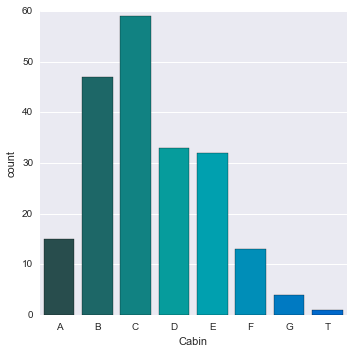

In [97]:
levels = []

for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']

sns.factorplot('Cabin',data=cabin_df,palette='winter_d')

In [98]:
cabin_df.head()

,Cabin
0,C
1,C
2,E
3,G
4,C


The "T" value doesn't make sense, so we will drop it out (we just want A-G)

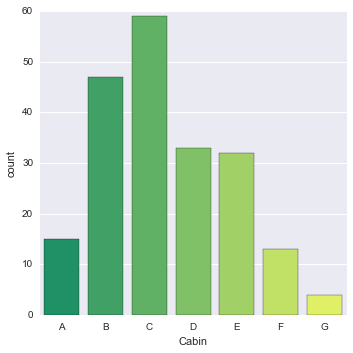

In [99]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']

sns.factorplot('Cabin',data=cabin_df,palette='summer')

To answer the question on whether the cabin/deck level affected the chance of survival, I will create a new dataframe because I will have to drop some rows from the dataframe due to the NaN values in the "Cabin" column.

In [100]:
titanic_df2 = titanic_df.dropna()

In [101]:
titanic_df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Person,Alone
1,1,1,female,38,1,0,71.2833,C85,Cherbourg,female,With Family
3,1,1,female,35,1,0,53.1000,C123,Southampton,female,With Family
6,0,1,male,54,0,0,51.8625,E46,Southampton,male,Alone
10,1,3,female,4,1,1,16.7000,G6,Southampton,child,With Family
11,1,1,female,58,0,0,26.5500,C103,Southampton,female,Alone


Now I want to create a new column called "Deck" which will parse the "Cabin" column and return the deck that the passenger was on.  Note that the cabin number is prefixed with a letter, which indicates which deck the passenger was on.  I will do this using the apply function and so first need to create a function

In [102]:
def Deck(cabin):
    return cabin[0]

In [103]:
titanic_df2['Deck'] = titanic_df2['Cabin'].apply(Deck)

/Users/macl2/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


I can ignore the warning above as this has worked perfectly

In [104]:
titanic_df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Person,Alone,Deck
1,1,1,female,38,1,0,71.2833,C85,Cherbourg,female,With Family,C
3,1,1,female,35,1,0,53.1000,C123,Southampton,female,With Family,C
6,0,1,male,54,0,0,51.8625,E46,Southampton,male,Alone,E
10,1,3,female,4,1,1,16.7000,G6,Southampton,child,With Family,G
11,1,1,female,58,0,0,26.5500,C103,Southampton,female,Alone,C


OK, this looks good. Let's now plot this information and see if the deck you were travelling on was a factor in whethee or not you survived the crash.

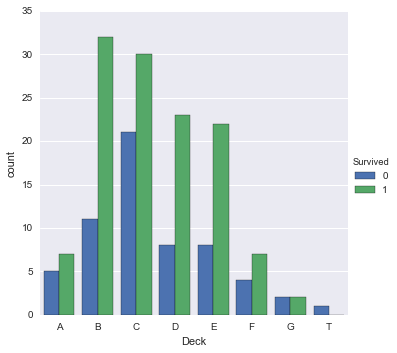

In [105]:
sns.factorplot('Deck',hue='Survived',data=titanic_df2)

This shows that for every deck where we have information on passengers, you were more likely to surive than not survive.  What is interesting is that if you were on the 'C' deck, you were less likely to survice however, which is in marked contrast to the 'B' and 'D' decks where you were more likely to survive than any other deck.  Now, we lose a lot of information if we only look at the passengers who have this recorded, but it is still interesting.  In fact, we can quantify this below.

In [106]:
titanic_df['Survived'].value_counts()

0    549
1    342
dtype: int64

In [107]:
titanic_df2['Survived'].value_counts()

1    123
0     60
dtype: int64

So, where we take into account everyone, (in the training dataset), you only had a 38% survival rate.  However, where we do have the information on their cabin, then they had a 67% surival rate.  Now, we don't know why some passengers didn't have their cabin recorded, but if you were unlucky to fall into this set, then you only had a 31% chance of surviving!

So that concludes my look at the data.  Now I will try and do some machine learning in order to predict whether someone was likely to survive the accident or not.

# Now let's look into doing some machine learning

The first thing that I will do is remind myself of what the titanic DataFame looks like.

In [108]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Person,Alone
0,0,3,male,22,1,0,7.2500,NaN,Southampton,male,With Family
1,1,1,female,38,1,0,71.2833,C85,Cherbourg,female,With Family
2,1,3,female,26,0,0,7.9250,NaN,Southampton,female,Alone
3,1,1,female,35,1,0,53.1000,C123,Southampton,female,With Family
4,0,3,male,35,0,0,8.0500,NaN,Southampton,male,Alone


One of the problems I have is that some of the columns are categorical variables.  These are 'Pclass", "Sex" and "person".  Now, of course I don't want to use both the "sex" and "person" columns and I think "sex" is the best because we are also including the age column and there is some overlap between age and "child".  As I also saw earlier, the "Pclass" and "Fare" data were highly correlated so I don't want to include them both in the machine learning.  As "Pclass" is a categorical variable, it makes more sense to drop that.  I also don't need the "Cabin" cloumn (which is again correlated to the fare) and nor do I need the "Embarked" column.  I will then drop these.  As the "Alone" column was created from the "SibSp" and "Parch" columns, there will be strong correlations so I should also get rid of that.  First of all though, I will make a copy of the DataFrame and then drop the columns

In [109]:
ml_df = titanic_df.copy()
ml_df.drop(["Person","Cabin","Embarked","Pclass","Alone"],axis=1,inplace=True)
ml_df.dropna(inplace=True)

In [110]:
ml_df.head()

,Survived,Sex,Age,SibSp,Parch,Fare
0,0,male,22,1,0,7.2500
1,1,female,38,1,0,71.2833
2,1,female,26,0,0,7.9250
3,1,female,35,1,0,53.1000
4,0,male,35,0,0,8.0500


Now I should create new columns for the "Sex" categorical variable.  This will create a DataFrame with 0s and 1s as to whether they are male or female.

In [111]:
Sex_dummies = pd.get_dummies(ml_df['Sex'])
Sex_dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


Now I need to drop the "Person" column and then concatenate the new "child", "female" and "male" columns onto the existing DataFrame

In [112]:
ml_df.drop("Sex",axis=1,inplace=True)

In [113]:
ml_df = pd.concat([ml_df,Sex_dummies],axis=1)

In [114]:
ml_df.head()

,Survived,Age,SibSp,Parch,Fare,female,male
0,0,22,1,0,7.2500,0,1
1,1,38,1,0,71.2833,1,0
2,1,26,0,0,7.9250,1,0
3,1,35,1,0,53.1000,1,0
4,0,35,0,0,8.0500,0,1


OK, now I have got my catergorical variables into the correct shape, I can start to do some machine learning!

I need to change my dataset so that I have some features (X) and labels (Y - Survived).

In [115]:
Y = ml_df['Survived']
X = ml_df.drop("Survived",axis=1)

X.head()

,Age,SibSp,Parch,Fare,female,male
0,22,1,0,7.2500,0,1
1,38,1,0,71.2833,1,0
2,26,0,0,7.9250,1,0
3,35,1,0,53.1000,1,0
4,35,0,0,8.0500,0,1


Now I have to flatten my Y array for this to work.

In [116]:
Y = np.ravel(Y)

Remember that for the machine learning, I want to have a training dataset and a test dataset.  Now, the Kaggle data comes with a training dataset and a test dataset.  However, as it is a competition, the "Survived" column is missing from the test dataset.  Therefore, the first thing I want to do is to split the dataset into a "training" and a "test" dataset.  In order to do this, I need to make some imports from the sklearn modules.

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics

Now I have to split my data into a training set and a test set

In [118]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

### Logistical Regression

A reminder that the logistic function can take an input from negative to positive infinity and it has always has an output between 0 and 1. The logistic function is defined as:
$$ \sigma (t)= \frac{1}{1+e^{-t}}$$

Now I create my logistic regression model, fit the data and then check the accuracy on this traning dataset.

In [119]:
log_model = LogisticRegression()
log_model.fit(X_train,Y_train)
round(log_model.score(X_train,Y_train),4)

0.7813

This shows that it is about 79% accurate on the training datset.  That is OK and at least it is close to 80%.  Let's now look at how well it predicts the test dataset. 

In [120]:
predict = log_model.predict(X_test)
print round(metrics.accuracy_score(Y_test,predict),4)

0.7654


So, this is about 78% accurate on the test dataset.  So, there is little difference between the two.  What I can look at also is the score if I trained on the whole dataset (train.csv file).

In [121]:
log_model2 = LogisticRegression()
log_model2.fit(X,Y)
round(log_model2.score(X,Y),4)

0.7801

Surprisingly, this doesnt make any difference, it is in fact slightly lower than training on the split dataset.  I think that this is telling me that the split dataset had enough statistics with which to train my model.

That is OK, but what about different models?

### SVM Model

The Support Vector Machine model tries to separate linearly between the two classes and chooses a decision boundary which maximises the distance between the two classes.  In a multi-dimensionl model, this turns into a hyperplane in multi-dimensional space.  I will now repeat the exercise with the new model.

In [122]:
from sklearn.svm import SVC
svm_model = SVC()

In [123]:
svm_model.fit(X_train,Y_train)
round(svm_model.score(X_train,Y_train),4)

0.9215

Aha!  This shows a marked improvement on the logistical regression case and is now 92% accurate on the training dataset, as opposed to the 82% we saw previously.  Now let's look at how it does on the test dataset.

In [124]:
predict_svm = svm_model.predict(X_test)
print round(metrics.accuracy_score(Y_test,predict_svm),4)

0.6592


That is strange!  The model was significantly better on the training dataset but it is significantly worse on the test dataset.  Now it is time to try another model!

### kNN - k Nearest Neighbours

The kNN model classifies something by how close it is in space to it's nearest neighbours.  I will now run a kNN analysis on this same dataset to see the output.

In [125]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 6)
knn_model.fit(X_train,Y_train)
round(knn_model.score(X_train,Y_train),4)

0.7589

So this is similar to the logistic regression number.  Let's see what we get out of the test dataset.

In [126]:
predict_knn = knn_model.predict(X_test)
print round(metrics.accuracy_score(Y_test,predict_knn),4)

0.7039


Now, this number is strongly dependent on the number of nearest neighbours that we have.  We can vary this number to see what the answer is.

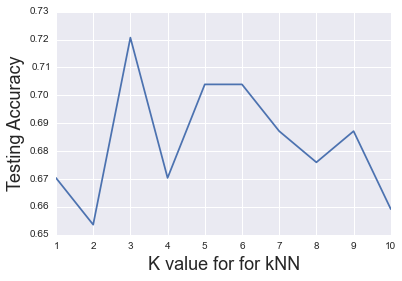

In [127]:
# Test k values 1 through 10
k_range = range(1, 11)

# Set an empty list
accuracy = []

# Repeat above process for all k values and append the result
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))
    
plt.plot(k_range, accuracy)
plt.xlabel('K value for for kNN', fontsize=18)
plt.ylabel('Testing Accuracy', fontsize=18)

From this, I see that 6 is not the best, but it is not so far off.  Perhaps using 3 as the number of nearest neighbours is the best, although this is very similar to 7, 8 and 9.  In all cases, this is down to around the same result we get out of the svn analysis and lower than the logistic regression analysis.  Let's try one more model:

### Naive Bayes

The Naive Bayes model uses Bayes theorem in order to make predictions.  It is called naive as it assumes that all the features are independent of each other.

In [128]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train,Y_train)
round(nb_model.score(X_train,Y_train),4)

0.7794

In [129]:
predict_nb = nb_model.predict(X_test)
print round(metrics.accuracy_score(Y_test,predict_knn),4)

0.7039


So, the numbers for the Naive Bayes method is similar to the kNN and svm methods.  The best one I came up with was logistic regression.

## Notebook Summary

In this notebook I have taken the data on Titanic passengers from a csv file, and with it, created a Pandas DataFrame.  By manipulating the DataFrame, we were able to see a number of interesting things:

- 1) You were more likely to die if you were male then female
- 2) If you were in 1st or 2nd class, you had a much better chance of survival than in 3rd class
- 3) If you were travelling with family members, you were also much more likely to survive
- 4) An older male was more likely to perish than a younger male whereas an older female was more likely to survive than a younger female

There was also some interesting tidbits of information.  An example of this is that the majority of passengers didn't have their cabin number recorded.  However, in the sample that did have their cabin number recorded, the survival rate was over 65%, compared to under 40% survival rate of all the passengers in general.  It is not easily reconcilible as to why this would be the case, unless some of the information was only gleaned from passengers who survived once they arrived in New York or at a later time.

I have then applied some machine learning techniques to the dataset.  Using logistic regression, I was able to predict with almost 80% accuracy whether a passenger would survive or perish on the Titanic given their other attributes.  Note that if I predicted all perished, then this would be correct roughly 66% of the time so I am significantly better than that.  However, using the svm, kNN and naive Bayes methods, these were not substantially better than the 66% value!